## Assignment 2 

## Inceptionism, Video Surveillance and Motion detection

Given date: November 17th

Due date: December 6th  

Total : 40pts + 6pts 

Additional readings (To go further): 
 - [Google AI post on "inceptionism"](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)
 - [Dumitru Erhan, Yoshua Bengio, Aaron Courville, and Pascal Vincent, Visualizing Higher-Layer Features of a Deep Network](https://pdfs.semanticscholar.org/65d9/94fb778a8d9e0f632659fb33a082949a50d3.pdf)
 - [On the Applications of Robust PCA in Image and Video Processing, T. Bouwmans, S. Javed, H. Zhang, Z. Lin, R. Otazo](https://hal.archives-ouvertes.fr/hal-01891028/document)
 - [Robust principal component analysis? EJ Candès, X Li, Y Ma, J Wright ](https://arxiv.org/pdf/0912.3599.pdf)
 - [Locally linear denoising on image manifolds, D. Gong, F. Sha G. Medioni](http://proceedings.mlr.press/v9/gong10a/gong10a.pdf)
 - [Nonlinear Image Interpolation using Manifold Learning, C Bregler, S. M. Omohundro'](https://pdfs.semanticscholar.org/9090/d0c4de232112602e0cb3b313c88016261dd0.pdf)

The assignment is divided into three parts. In the first part, we will go back to neural networks. You will first be asked to train a simple network through your own implementation of backpropagation.  

and we will study one way to get intuition on what the networks are learning, i.e. how they view the world, a concept termed inceptionism by the original google papers. In the second part, we will use a robust version of PCA to extract the foreground from video surveillance sequences. Finally the last exercise   

### Exercise 1. (16pts + 3pts) Building and training your neural network

The main point of this first exercise is to code and train a simple neural network, including backpropagation, from scratch. 

Consider the binary dataset shown below. For this exercise, you are asked to build a simple __two hidden layers__ neural network (You have to consider at least two hidden layers for backpropagation to be sufficiently interesting) with __at least two neurons__ in each layer. We will use sigmoids as our activation functions and use the binary cross entropy loss function. Don't forget to put a sigmoid activation to your final neuron in order to get a binary output. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io
mat1 = scipy.io.loadmat('Ex0dataClass1.mat')
mat2 = scipy.io.loadmat('Ex0dataClass2.mat')


mat1 = mat1['dataClass1']
mat2 = mat2['dataClass2']


plt.scatter(mat1[:,0], mat1[:,1], c = 'r')
plt.scatter(mat2[:,0], mat2[:,1], c = 'b')
plt.title('DataSet 1')

plt.show()

#### Exercise 1.1.1 (8pts) Start by completing the 'cross_entropyLoss' function below 

In [ ]:
from numpy import linalg as LA
from scipy.optimize import minimize


def cross_entropyLoss(X, t, W, lambda0):
    """ Define the loss cross entropy loss function with ell_2 regularization 
    based on data stored in the matrix X with associated targets in t. 
    The network has weights stored in the vector W (up to you to decide how you organize the weights)
    
    The function should ouptut the value of the regularized cross entropy loss for 
    the regularizer stored in lambda0. 
    
    I.e. if you have N points stored in X, you have to return the value of the regularized loss
    
    l(W) = -1/N sum_{i=1}^N [t_i log(y(x_i)) - (1-t_i)log(1-y(x_i))] + (lambda0/2/N)*( sum_{i=1}^M W_i)
    
    Also note that when we regularize, we usually don't regularize the first bias. 
    The point of regularization is indeed to make the curve 
    """
    
    N = t.size
    M = W.size
    
    #========================================================================================
    
    # Compute the output of the network and gradient 
    
    
    #========================================================================================
    
    
    # y should encode the output of the network for a the vector of inputs X 
    y = 0 
    loss =  - np.true_divide(1, N) * np.dot(t, np.log(y)) + np.dot((1-t), np[.log(1-y)])
    weightsR = W
    weightsR[0]=0 
    regularizationW = np.true_divide(1, M)*np.true_divide(1,2) * LA.norm(weightsR)**2
    loss_regularized = loss + regularizationW
    grad = np.zeros(W.shape)
    
    
    return loss, gradient 



#### Exercise 1.1.2 (4pts)  Complete and use the 'training' function to get the weights of your network 

In [ ]:

def training(X, Winit, learning_rate, MaxIter):
    '''The function should returned the trained neural network starting with weights 
    initialized by Winit. To complete the training, we will use the function and gradient of 
    the binary cross entropy function that you computed above and combine them with the   '''
    
    f = lambda W: cross_entropyLoss(X, t, W, lambda0):
    
    
    # The Truncated Newton Algorithm (TNC in scipy.optimize) comes with several options 
    # which you can set, one of those options being the maximum number of iterations
    
    fmin = minimize(f, Winit, method='TNC', jac=True,\
                    options={'gtol': 1e-6, 'disp': True})
    
    minimum = minimize(fun=functionHandle, Winit, args=(input_size, hidden_size, num_labels, X, y, learning_rate), 
                method='TNC', jac=True, options={'maxiter': MaxIter})
    
    # the optimal weight vector is stored in the ouput minimum.x
    
    return minimum.x


#### Exercise 1.1.3. (4pts) Finally, complete the prediction function and check the prediction of your neural network on the test set provided below 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

import scipy.io
matTest = scipy.io.loadmat('dataTestEx0.mat')
XTest = matTest['dataTest']



def prediction(XTest, Wtrained):
    
    '''This function should return the output of the network y(Wtrained; x) for the points 
    stored in the validation Matrix XTest'''
    
    # ===================================================================
    
    # Complete the function with your own code 
    
    # ===================================================================
    
    
    y = 0 # This line should be replaced with the output of your trained network
    
    return y

#### Bonus 1.2. (3pts) Rationalizing networks architectures

In this bonus, we would like to build a neural network that is given by a succession of linear filters (as usual) and +1/-1 step functions (not Relus!). Given this specification, Try to determine what would be the simplest structure that can separate the two classes given in the 'BonusdataClass1' and 'BonusdataClass2' below. 

(hint: There is no need to build the network, just try to answer the question. Think of the network of a combination/cascade of separating planes)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io
mat1 = scipy.io.loadmat('BonusdataClass1.mat')
mat2 = scipy.io.loadmat('BonusdataClass2.mat')

mat1 = mat1['BonusdataClass1']
mat2 = mat2['BonusdataClass2']

plt.scatter(mat1[:,0], mat1[:,1], c = 'r')
plt.scatter(mat2[:,0], mat2[:,1], c = 'b')
plt.title('DataSet 2')
plt.show()



### Exercise 2. (9pts + 3pts) Après l'effort le Réconfort: Inceptionism

In this exercise, we are interested in replicating an approach known as inceptionism or activation maximization which gives an insight on how neural networks 'see' the world. The idea is that once a network has been trained, one can try to understand what are the input images that will lead to a maximum value of any given activation $\sigma(\sum_{i=1}^N w_{ij}x_j)$ in the network. If we choose the activation to be the one attached to the output unit, then such a maximization should generate the image that is the most likely to be classified as the object encoded by the corresponding output/label (e.g. 'plane', 'boat',...)

<img src="deepdream1.jpeg" alt="Drawing" style="width: 400px;"/>

image credit:  [https://www.redsharknews.com/](https://www.redsharknews.com/technology/item/2705-this-may-be-the-weirdest-video-you-have-ever-seen) 

On top of providing the building blocks for the assembling of neural networks, Keras also provides pretrained versions of some popular neural network architectures, for some specific datasets. 

#### Question 2.1: (1pt) Getting some intuition on the VGG16 model

As an illustration of this, use the lines below to load the VGG16 model which has weights pretrained on ImageNet. There are two functions we can use to visualize the VGG network. The first one is 'print(model.summary())'. The second one is 'plot_model(model, to_file='pretrained_vgg.png')'. Use those lines to get some intuition on the VGG model. What do the dimensions of each filter correspond to ?

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

# build the VGG16 network
model = VGG16(include_top=False, weights='imagenet')

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='pretrained_vgg.png')

In order to access the output of specific layers, we will want to keep a list of those layers. Use the line below to store the name of each layer in the dictionnary 'layer_dict'.  

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

#### Exercise 2.2. (2pts) Implementing Activation Maximization through the Backend 

Another interesting feature of Keras is the "backend". Although the first objective of Keras is to provide the high level building blocks to develop deep learning models, it also provides some access to lower level functions through its backend engines which handle tensor manipulation. Keras has three backend implementations : TensorFlow, Theano and CNTK. The backend API provide some useful functions which are ususally used to make the function that are written compatible with Theano or TensorFlow. 

In this exercise, we will use several function from the backend to access and optimize the ouput of particular layers in the network. The lines below define a function 'iterate' which when applied to an input of dimension equal to the input dimension of VGG16, return the output of the layer 'block5_conv1' and the corresponding gradient. I.e. if you apply the function 'iterate' to an image of dimension equal to the input dimension of the 'input_5' layer, i.e. iterate([input_img_data]) you get an output of the form [loss_value, grads_value] 


#### Using the lines below apply a few steps of activation maximization (taking 20 iterations with a step size of '1' is a good start)

In [93]:
from tensorflow.keras import backend as K
import numpy as np

layer_output = layer_dict['block5_conv1'].output

# Here we choose the first filter in the layer 'block5_conv1'
loss = K.mean(layer_output[:, :, :, 0])

img_width = 224
img_height = 224
input_img_data = np.random.random((1,img_width, img_height,3)) * 20 + 128



inp = model.input   
grads = K.gradients(loss, inp)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([model.input], [loss, grads])

#==========================================================================================

# Put your code here

#==========================================================================================


#### Exercise 2.3. (1pt) Displaying the resulting image 

Use the function below to preprocess your result and display the result using the imshow function from pyplot. 

In [ ]:
from scipy.misc import imsave 
import matplotlib.pyplot as plt

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

#### Exercise 2.4. (2pts) Try a couple more filters of your choice.

In [ ]:
# put your code here



#### Exercise 2.5. (3pts) Maximizing the class

Now that we found the images that are maximizing the outputs of particular layers, we want to understand what are the images that are the most likely to be classified in each of the particular classes. A first easy way to do this is to use the line below

loss = K.mean(model.output[:, output_index])


#### Bonus 2.6. (3pts) One step futher 

In the previous step, what we have done is maximizing the feature (i.e the result of the feature extraction step). In order to understand how the network understands each class, we could instead maximize the result of the classification step (i.e the final label returned by the network). Code this second approach below

In [ ]:
# put your code here



### Exercise 3. (10pts) Robust PCA for video surveillance 

We have seen that PCA retains an approximation of an original dataset $X$ by focusing on the largest singular values. Such an order $K$ approximation can be obtained from the singular value decomposition $\boldsymbol U \boldsymbol \Sigma \boldsymbol V^T$ by truncating $\boldsymbol U$ to the first $K$ columns, retaining the $K\times K$ diagonal matrix $\boldsymbol \Sigma_k$ as well as the first $K$ rows of $\boldsymbol V^T$, $\boldsymbol V_k^T$, and writing the approximation as $\boldsymbol U_k \boldsymbol \Sigma_k \boldsymbol V^T_k$. This approach is particularly efficient when each of the feature vectors (or images in this case) are close to each other. When there is sharp variations across images, such as when an object appears, move throughout the images and then dissapears, a simple PCA does not suffice anymore and one might want to extend it to something more robust. The escalator sequence below is an example of such sequence. 

(20800,)


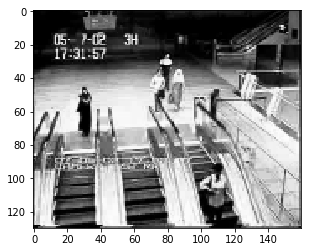

In [157]:
import numpy as np
import cv2

import numpy as np
import cv2
import matplotlib.pyplot as plt

# read video

import scipy.io
movie = scipy.io.loadmat('escalator_data.mat')
#frame0 = 
print(np.shape(movie['X'][:,0]))

plt.imshow(movie['X'][:,0].reshape((160,130)).swapaxes(0, 1), cmap='gray')
plt.show()

The idea of Robust PCA is to add a "sparse" component to the traditional PCA decomposition. Given a collection of images that we store as the columns of the matrix $X$, one then looks for a decomposition
 
\begin{align} 
\boldsymbol X = \boldsymbol Y + \boldsymbol S
\end{align}

Where $Y$ is a matrix which encode the original PCA model, and thus encodes the part of the images that remains approximately constant throughout the sequence, and $\boldsymbol S$ is the sparse part (i.e a sequence of images that are varying through the sequence but only at a precise position in the images, that is to say with most of the pixels being zero). To recover each part one approach is to proceed as follows, see [Candes et al.](https://arxiv.org/pdf/0912.3599.pdf)

We let $\mu$ to denote the parameter that controls the amount of dara we want to store in the sparse foreground extraction part, $\boldsymbol S$. The algorithm proceeds as follows


__Initialize__ $Y$, $S$ to $0$

__Step 1.__ Compute the truncated SVD of the matrix $X - S - \mu^{-1}Y$, i.e. let $X - S - \mu^{-1}Y = U\Sigma V^T$. The truncated SVD is then obtained by replacing the diagonal matrix of singular values with the truncation 
$$ 
\sigma \leftarrow \text{sign}(\sigma)\max(|\sigma| - \mu, 0)  
$$

and store it in $L$, $L = SVD_{\mu}(X - S - \mu^{-1}Y)$ 



__Step 2.__ Apply the thresholding operator $f(x) = \text{sign}(x)\max(|x| - \lambda \mu, 0) $ with threshold $\lambda\mu$ to the entries of the matrix $X - L + \mu^{-1}Y$

__Step 3.__ Update the matrix $Y$ as $Y \leftarrow Y + \mu(X - L - S)$


A good approach to initialize the parameters is to take $lambda = 1/\max(m,n)$ where $\max(m,n)$ is the max number of rows or columns of the data matrix. We can then set $\mu = 0.25*(m*n)/(\sum_{i,j}|X_ij|)$. One can then terminate the algorithm when $\|X-L-S\|_F \leq  \delta \|X\|_F$ where $\|X\|_F$ is the Frobenius norm of the matrix and $\delta$ can be taken for example as $10^{-7}$. 


Additional indications: if computing the full SVD from linalg is too expensive, you can replace it with the fast randomized PCA from facebook (see [fbpca](https://fbpca.readthedocs.io/en/latest/)) or a sparse SVD.


#### Exercise 3.1. (8pts) Complete the code below which separates the sparse part from the PCA decomposition

In [ ]:
import numpy as np 
from __future__ import division
from scipy.sparse.linalg import svds




def robustPCA(X, delta=1e-6, mu=None, maxiter=500):

    '''
    The function should return a PCA like part stored in 'L' with only a few singular values 
    that are non zero and a sparse sequence 'S' in which the images are black except w very 
    limited number of pixels
    '''
    
    
    # Initialize the tuning parameters.
    lam = # put your value for lambda
    if mu is None:
        
        # complete with your value for mu
        
    # Convergence criterion.
    norm = np.sum(X ** 2)

    # Iterate.
    i = 0
    rank = np.min(shape)
    S = np.zeros(shape)
    Y = np.zeros(shape)
    while i < max(maxiter, 1):
        
        
        # Step 1. Compute and truncate the SVD
        
        

        # Step 2. Truncate the entries of X - L + mu^(-1)Y 
        

        # Step 3. Update the matrix Y
        
        

        # Convergence criterion
        err = np.sqrt(np.sum(step ** 2) / norm)
        if err < delta:
            break
        i += 1

    if i >= maxiter:
        break
        
    return L, S


#### Exercise 3.2. (2pts) Apply your function to the escalator sequence and display the result on at least one frame. Use subplot to display the extracted background and its corresponding foreground side by side. 

In [ ]:
# put your code here

## Exercise 4 (5pts) Manifold Learning

Download [Columbia University COIL-20 Image Library](http://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php). In this last exercise, you will get to apply some of the methods that were covered in the last part of the course. 


#### Exercise 4.1. (3pts) Extracting the motion

Pick up any image of your choice (some images might be easier than others) and load the whole sequence corresponding to the rotation of the object you chose. Then use one of the manifold learning methods that were covered in class and implement it to get a low dimensional representation of the motion. If you put yourself in the position of the viewer and not the object, you can think of each image as a frame captured by a moving robot whose trajectory you want to track.

What is the motion in this case? How many dimensions do you think you would need to capture that motion? Can your Manifold learning approach recover that motion?


#### Exercise 4.2. (2pt) Predicting the orientation.

Repeat the steps that you followed in 4.1 but now split the sequence into a size $N-1$ training set and a size $1$ validation set. Assign angles to the images in the training set based on how each image looks to you. Then use your manifold learning algorithm to recover the angle of the validation frame. 

In [146]:
import cv2
from skimage.color import rgb2gray

# Checking size. Here we take the first 71 images (the Duck sequence)  

s1 = "coil-20-proc/obj1__%d.png" %i
im = cv2.imread(s1)

sz = np.shape(im)
Sequence = np.zeros((sz[0]*sz[1], 71))

for i in range(0,71):
    
    s1 = "coil-20-proc/obj1__%d.png" %i
    im = rgb2gray(cv2.imread(s1))
    Sequence[:,i] = im.flatten()
    
    
